# WRKY_DBD

## Domain Knowledge

* Transcription factors (TFs, 轉錄因子) are proteins that controls the rate of transcription of genetic information from DNA to messenger RNA, by binding to a specific DNA sequence.

* Transcription factors contain two domains:
    * DNA-binding domain (DBD): attaches to specific sequences of DNA
    * Activation domain (AD):

* TFs are classified into families according to their DBDs.

### Motivations

* Only a handful of TFs have been studied their DNA binding patterns.
    * only < 2% of eukaryotic TFs (M. T. Weirauch, et. al, 2014)
    * About 57% of Arabidopsis thaliana TFs (Data from PlantPAN 3.0 and PlantTFDB v4.0)
* Experimental protein structure determination is hard.

### Problems

* Whether we can predict **DNA binding sites** (DNA結合位點) by using polypeptide (多肽) sequences or DNA-binding domain?
* Whether we can determine **the key amino acids**(必須胺基酸) essential for **DNA recognition** from known **TF-DNA pairs**?
* Are there **unknown features** in polypeptide sequences which can be used to illustrate the interaction between TF and DNA?

## Datasets descriptions

### WRKY_info_table_positive.txt
Column Name:
* TF identifier (TF_ID): 在第一個數字以前的，是該植物的品種縮寫；此處所有的TF皆是屬於WRKY家族的。
* Protein sequence identifier (Pseq_ID): 蛋白質序列的ID(同個TF_ID可能有一個以上的Pseq_ID)
* Protein primary sequence (Pseq): 蛋白質序列，對應Pseq_ID，有不同的胺基酸組成序列，每一個英文字母對應一種[胺基酸](http://www.bioinformatics.org/sms/iupac.html)
* DNA- binding domain sequence (DBD_seq): 蛋白質序列(Pseq)中，DBD的序列
* Binding matrix identifier (matrix_ID): 要進行轉錄的DNA片段

Note: Please don’t use matrix_ID as a feature.

### All_matrices_output.txt
Column Name:
* Binding matrix identifier (matrix_ID): 要進行轉錄的DNA片段(基因)
* A
* C
* G
* T

## Load datasets


In [1]:
import pandas as pd
import numpy as np

In [2]:
dfp = pd.read_csv('WRKY_info_20190507/WRKY_info_table_positive.txt', sep='\t')
dfn1 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_one.txt', sep='\t')
dfn2 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_two.txt', sep='\t')
dfn3 = pd.read_csv('WRKY_info_20190507/WRKY_info_table_negative_three.txt', sep='\t')

In [3]:
dfp.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
0,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
1,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0339
2,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0449
3,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0451
4,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0465


### Parse .meme file

In [4]:
inputfile = open('WRKY_info_20190507/All_matrices.meme', 'r')

In [5]:
for i in range(9):
    inputfile.readline()

In [6]:
outputfile = open('WRKY_info_20190507/All_matrices_output.txt', 'w')

In [7]:
outputfile.write('matrix_ID\tA\tC\tG\tT\n')

18

In [8]:
while True:
    s1 = inputfile.readline().rstrip('\n')
    
    # if this is the eof
    if len(s1) == 0:
        break
        
    t1 = s1.split()
    matrix_id = t1[1]

    inputfile.readline()
    inputfile.readline()
    while True:
        s2 = inputfile.readline()
        if s2 == '\n':
            break
        outputfile.write(matrix_id + '\t')
        outputfile.write(s2)

In [9]:
outputfile.close()
inputfile.close()

In [10]:
dfmeme = pd.read_csv('WRKY_info_20190507/All_matrices_output.txt', sep='\t')
dfmeme.head(30)

,matrix_ID,A,C,G,T
0,TF_motif_seq_0001,1.0,0.0,0.0,0.0
1,TF_motif_seq_0001,1.0,0.0,0.0,0.0
2,TF_motif_seq_0001,0.0,1.0,0.0,0.0
3,TF_motif_seq_0001,0.0,1.0,0.0,0.0
4,TF_motif_seq_0001,0.0,0.0,0.0,1.0
5,TF_motif_seq_0001,1.0,0.0,0.0,0.0
6,TF_motif_seq_0001,1.0,0.0,0.0,0.0
7,TF_motif_seq_0001,0.0,1.0,0.0,0.0
8,TF_motif_seq_0001,0.0,1.0,0.0,0.0
9,TF_motif_seq_0001,0.0,0.0,0.0,1.0


## Data Analysis

`logomaker` 可以用來幫助我們畫出一個 matrix 的樣子。

In [11]:
import logomaker as lm
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def draw_matrix(matrix_name):
    m = dfmeme[dfmeme.matrix_ID == matrix_name].reset_index().drop(['matrix_ID', 'index'], axis=1)
    m.index = m.index + 1
    lm.Logo(m)

In [13]:
dfmeme[dfmeme.matrix_ID == 'TF_motif_seq_0270']

,matrix_ID,A,C,G,T
11592,TF_motif_seq_0270,0.0,0.0,0.0,1.0
11593,TF_motif_seq_0270,0.0,0.0,1.0,0.0
11594,TF_motif_seq_0270,1.0,0.0,0.0,0.0
11595,TF_motif_seq_0270,0.0,1.0,0.0,0.0
11596,TF_motif_seq_0270,0.0,0.5,0.0,0.5


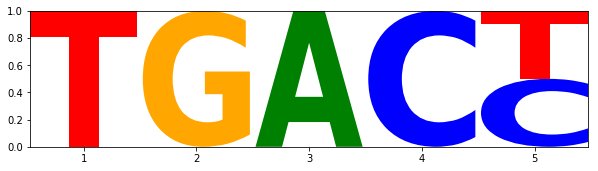

In [14]:
draw_matrix('TF_motif_seq_0270')

### Try 1

嘗試尋找 Longest common substring ...

In [15]:
seq_0270 = dfp[dfp.matrix_ID == 'TF_motif_seq_0270']
seq_0270.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
0,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
6,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...,TF_motif_seq_0270
12,AT1G13960,TFprotseq_12500,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
18,AT1G13960,TFprotseq_12500,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...,TF_motif_seq_0270
24,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TF_motif_seq_0270


In [16]:
seq_0270_DBD = seq_0270['DBD_seq']
seq_0270_DBD.head()

0     ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...
6     LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...
12    ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...
18    LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPK...
24    MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...
Name: DBD_seq, dtype: object

In [17]:
def lcs(S,T):
    m = len(S)
    n = len(T)
    counter = [[0]*(n+1) for x in range(m+1)]
    longest = 0
    lcs_set = set()
    for i in range(m):
        for j in range(n):
            if S[i] == T[j]:
                c = counter[i][j] + 1
                counter[i+1][j+1] = c
                if c > longest:
                    lcs_set = set()
                    longest = c
                    lcs_set.add(S[i-c+1:i+1])
                elif c == longest:
                    lcs_set.add(S[i-c+1:i+1])

    return lcs_set

當我們將`c`愈調愈大時，結果不如預期...

In [18]:
y = seq_0270_DBD[0]
c = 0
for x in seq_0270_DBD:
    c = c + 1
    if c == 3:
        break
    ret = lcs(y, x)
    y = list(ret)[0]
print(y)

PRSYYKCT


### Try 2

因為尋找 Longest common substring 的結果不是很好，所以我們先做單純的字元比較，不相同的字元就先遮蔽起來。

In [19]:
def compare_str(x, y):
    c = ''
    if len(x) < len(y):
        length = len(x)
    else:
        length = len(y)
    for i in range(length):
        if x[i] == y[i]:
            c += x[i]
        else:
            c += '-'
    return c

In [20]:
AT1G13960 = dfp[dfp.TF_ID == 'AT1G13960']
AT1G13960.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
0,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0270
1,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TF_motif_seq_0339
2,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0449
3,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0451
4,AT1G13960,TFprotseq_12499,MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMT...,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,TFmatrixID_0465


In [21]:
AT1G18860 = dfp[dfp.TF_ID == 'AT1G18860']
AT1G18860.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
24,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TF_motif_seq_0270
25,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TF_motif_seq_0339
26,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TFmatrixID_0442
27,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TFmatrixID_0444
28,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TFmatrixID_0445


In [22]:
AT1G29280 = dfp[dfp.TF_ID == 'AT1G29280']
AT1G29280.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
47,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TF_motif_seq_0270
48,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TF_motif_seq_0339
49,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TFmatrixID_1455
50,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TFmatrixID_1461
51,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TFmatrixID_0442


In [23]:
AT1G29860 = dfp[dfp.TF_ID == 'AT1G29860']
AT1G29860.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
73,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TF_motif_seq_0270
74,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TF_motif_seq_0339
75,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TFmatrixID_1459
76,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TFmatrixID_0442
77,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TFmatrixID_0443


In [24]:
AT1G13960.loc[0, 'DBD_seq']

'ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP'

In [25]:
AT1G13960.loc[6, 'DBD_seq']

'LDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPKAVVTTYEGKHNHDL'

In [26]:
compare_str(AT1G13960.loc[0, 'DBD_seq'], AT1G13960.loc[6, 'DBD_seq'])

'-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------'

In [27]:
compare_str(AT1G13960.loc[0, 'DBD_seq'], AT1G18860.loc[24, 'DBD_seq'])

'--DG--WRKYGQK--KG---PR-YY-CT--------K------------I------H--'

In [28]:
compare_str(AT1G13960.loc[0, 'DBD_seq'], AT1G29280.loc[70, 'DBD_seq'])

'--D---WRKYGQK--KGS--PR-YY-C---------K---------T-I-------H--'

In [29]:
compare_str(AT1G13960.loc[0, 'DBD_seq'], AT1G29860.loc[73, 'DBD_seq'])

'--DGY-WRKYGQK-VK-S--PRSYY-CT---C-VKK-VERS-------I---------P'

In [30]:
AT1G13960.loc[0, 'Pseq']

'MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMTLVSNMFPDSDEFRSFSQLLAGAMSSPATAAAAAAAATASDYQRLGEGTNSSSGDVDPRFKQNRPTGLMISQSQSPSMFTVPPGLSPAMLLDSPSFLGLFSPVQGSYGMTHQQALAQVTAQAVQANANMQPQTEYPPPSQVQSFSSGQAQIPTSAPLPAQRETSDVTIIEHRSQQPLNVDKPADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEPPQNTKRGNKDNTANINGSSINNNRGSSELGASQFQTNSSNKTKREQHEAVSQATTTEHLSEASDGEEVGNGETDVREKDENEPDPKRRSTEVRISEPAPAASHRTVTEPRIIVQTTSEVDLLDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPKAVVTTYEGKHNHDLPAAKSSSHAAAAAQLRPDNRPGGLANLNQQQQQQPVARLRLKEEQTT'

In [31]:
AT1G13960.loc[12, 'Pseq']

'MSEKEEAPSTSKSTGAPSRPTLSLPPRPFSEMFFNGGVGFSPGPMTLVSNMFPDSDEFRSFSQLLAGAMSSPATAAAAAAAATASDYQRLGEGTNSSSGDVDPRFKQNRPTAVLDLICNIVQGSYGMTHQQALAQVTAQAVQANANMQPQTEYPPPSQVQSFSSGQAQIPTSAPLPAQRETSDVTIIEHRSQQPLNVDKPADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEPPQNTKRGNKDNTANINGSSINNNRGSSELGASQFQTNSSNKTKREQHEAVSQATTTEHLSEASDGEEVGNGETDVREKDENEPDPKRRSTEVRISEPAPAASHRTVTEPRIIVQTTSEVDLLDDGYRWRKYGQKVVKGNPYPRSYYKCTTPGCGVRKHVERAATDPKAVVTTYEGKHNHDLPAAKSSSHAAAAAQLRPDNRPGGLANLNQQQQQQPVARLRLKEEQTT'

In [32]:
AT1G13960.loc[0, 'DBD_seq']

'ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP'

### Try 3

計算 table_positive 當中，哪些 matrices 出現的次數較多，並比較看看他們的蛋白質序列。

In [33]:
matrix_ID_counts = dfp['matrix_ID'].value_counts()

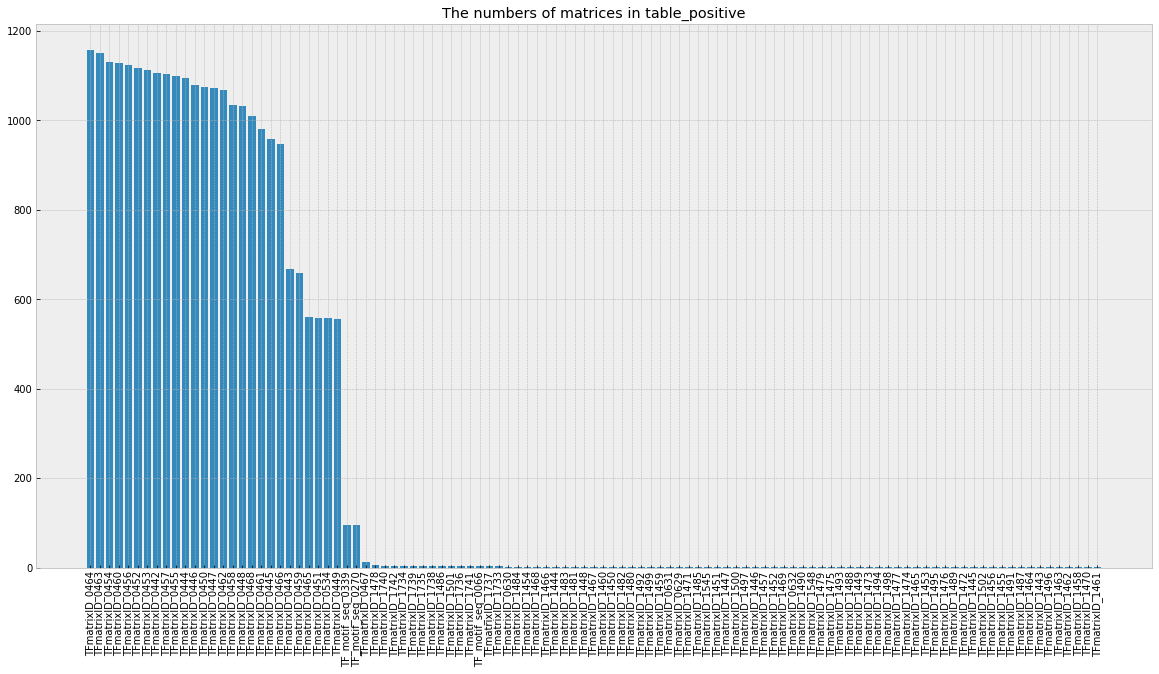

In [34]:
plt.figure(figsize=(20, 10))
plt.style.use('bmh')
plt.bar(matrix_ID_counts.index, matrix_ID_counts.values)
plt.xticks(rotation=90)
plt.title('The numbers of matrices in table_positive')
plt.show()

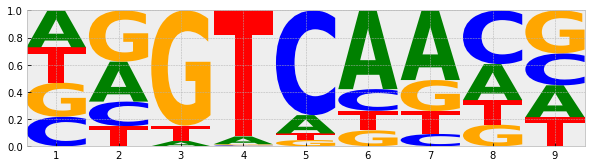

In [35]:
# 這是出現最多次的
draw_matrix('TFmatrixID_0464')

In [36]:
m0464 = dfp[dfp.matrix_ID == 'TFmatrixID_0464']
m0464.head()

,TF_ID,Pseq_ID,Pseq,DBD_seq,matrix_ID
44,AT1G18860,TFprotseq_12501,MDEAKEENRRLKSSLSKIKKDFDILQTQYNQLMAKHNEPTKFQSKG...,MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDM...,TFmatrixID_0464
70,AT1G29280,TFprotseq_12502,MKRGLDMARSYNDHESSQETGPESPNSSTFNGMKALISSHSPKRSR...,PSDSWAWRKYGQKPIKGSPYPRGYYRCSSTKGCPARKQVERSRDDP...,TFmatrixID_0464
95,AT1G29860,TFprotseq_12503,MDDHVEHNYNTSLEEVHFKSLSDCLQSSLVMDYNSLEKVFKFSPYS...,LEDGYRWRKYGQKAVKNSPYPRSYYRCTTQKCNVKKRVERSFQDPS...,TFmatrixID_0464
122,AT1G55600,TFprotseq_12505,MSDFDENFIEMTSYWAPPSSPSPRTILAMLEQTDNGLNPISEIFPQ...,PNDGYRWRKYGQKVVKGNPNPRSYFKCTNIECRVKKHVERGADNIK...,TFmatrixID_0464
147,AT1G62300,TFprotseq_12506,MDRGWSGLTLDSSSLDLLNPNRISHKNHRRFSNPLAMSRIDEEDDQ...,ISDGCQWRKYGQKMAKGNPCPRAYYRCTMATGCPVRKQVQRCAEDR...,TFmatrixID_0464


In [37]:
for i in range(100):
    print(compare_str(m0464.iloc[0, 3], m0464.iloc[i, 3]))

MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDMSILISTYEGTHNHPL
--D---WRKYGQK--KG-P-PR-YYRC-----CP-RKQV-R---D------TY---HNHP-
--DG--WRKYGQK--K--P-PR-YYRCT--------------------------------
-NDG--WRKYGQK--KGNP-PR-Y--CT--------------------------------
--DGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-ED-SILI-TYEG-HNHPL
--DG--WRKYGQK--K-N--PR-YYRCT--------------------------------
-NDG--WRKYGQK--K-----R-YYRCT-A----------------------------H--
-NDG--WRKYGQK--K-----R-YYRCT-A----------------------------H--
--DG--WRKYGQK--K--P--R-YYRCT-A----------------------------H--
MNDGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-EDMSILI-TYEGTHNHPL
-NDGCQWRKYGQK-AK-NP-PRAYYRC-----CPVRKQVQRC-E-------T---------
--DG--WRKYGQK--K--P--R-YYRC--A----------------------------H--
--DG--WRKYG-K---G-P-PR-Y--C---------K----------IL-----------
--D---WRKYGQK--KG-P-PR-YYRC-----C--RKQV-R---D---L--TY---HNHP-
--D---WRKYGQK---G---PRAYYRCT-----------Q------------------H--
----------------------------------------R-----S-----
--D---WRKYGQK-------P

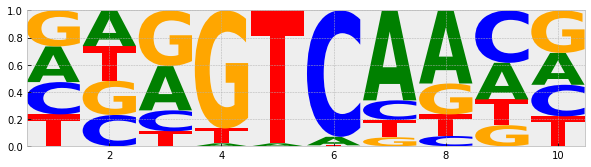

In [38]:
# 這是出現第2多次的
draw_matrix('TFmatrixID_0463')

In [39]:
m0463 = dfp[dfp.matrix_ID == 'TFmatrixID_0463']
for i in range(100):
    print(compare_str(m0463.iloc[0, 3], m0463.iloc[i, 3]))

MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDMSILISTYEGTHNHPL
--D---WRKYGQK--KG-P-PR-YYRC-----CP-RKQV-R---D------TY---HNHP-
--DG--WRKYGQK--K--P-PR-YYRCT--------------------------------
-NDG--WRKYGQK--KGNP-PR-Y--CT--------------------------------
--DGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-ED-SILI-TYEG-HNHPL
--DG--WRKYGQK--K-N--PR-YYRCT--------------------------------
-NDG--WRKYGQK--K-----R-YYRCT-A----------------------------H--
-NDG--WRKYGQK--K-----R-YYRCT-A----------------------------H--
--DG--WRKYGQK--K--P--R-YYRCT-A----------------------------H--
MNDGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-EDMSILI-TYEGTHNHPL
-NDGCQWRKYGQK-AK-NP-PRAYYRC-----CPVRKQVQRC-E-------T---------
--DG--WRKYGQK--K--P--R-YYRC--A----------------------------H--
--DG--WRKYG-K---G-P-PR-Y--C---------K----------IL-----------
--D---WRKYGQK--KG-P-PR-YYRC-----C--RKQV-R---D---L--TY---HNHP-
--D---WRKYGQK---G---PRAYYRCT-----------Q------------------H--
----------------------------------------R-----S-----
--D---WRKYGQK-------P

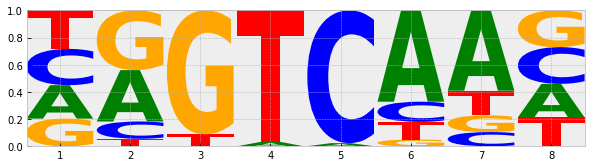

In [40]:
# 因為前兩個看起來結果都差不多 所以接下來挑一些後面一點的 看會不會有不太一樣的pattern
draw_matrix('TFmatrixID_0445')

In [41]:
m0445 = dfp[dfp.matrix_ID == 'TFmatrixID_0445']
for i in range(100):
    print(compare_str(m0445.iloc[0, 3], m0445.iloc[i, 3]))

MNDGCQWRKYGQKIAKGNPCPRAYYRCTIAASCPVRKQVQRCSEDMSILISTYEGTHNHPL
--D---WRKYGQK--KG-P-PR-YYRC-----CP-RKQV-R---D------TY---HNHP-
--DG--WRKYGQK--K--P-PR-YYRCT--------------------------------
-NDG--WRKYGQK--KGNP-PR-Y--CT--------------------------------
--DGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-ED-SILI-TYEG-HNHPL
--DG--WRKYGQK--K-N--PR-YYRCT--------------------------------
MNDGCQWRKYGQK-AKGNPCPRAYYRCT-A--CPVRKQVQRC-EDMSILI-TYEGTHNHPL
-NDGCQWRKYGQK-AK-NP-PRAYYRC-----CPVRKQVQRC-E-------T---------
--DG-QWRKYGQK----NP-PRAY--C--A-SC-V-K-VQR--ED-S-L--TYEG-HNHP-
--DG--WRKYG-K---G-P-PR-Y--C---------K----------IL-----------
--D---WRKYGQK--KG-P-PR-YYRC-----C--RKQV-R---D---L--TY---HNHP-
--DG--WRKYGQK--K----PR-YYRCT-------------------------------P
--DG--WRKYGQK--K-NP-PR-YY-CT--------------------------------
--D---WRKYGQK--KG-P-PR-YY-C-----CP-RK-V-RC----S-LI-TYEG-HNH--
--D---WRKYGQK--KG-P-PR--Y--
--D---WRKYGQK--KG-P-PR-YYRC-----CP-RKQV-R---D-S-L--TY---HNHP-
--D---WRKYGQK--KG-P-PR-YYRC-----CP-RKQV-R---D-S-

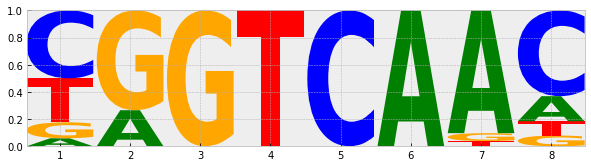

In [42]:
# 
draw_matrix('TFmatrixID_0449')

In [43]:
m0449 = dfp[dfp.matrix_ID == 'TFmatrixID_0449']
for i in range(100):
    print(compare_str(m0449.iloc[0, 3], m0449.iloc[i, 3]))

ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
ADDGYNWRKYGQKQVKGS-FPRSYYKCT-P-CPVKKKVERSLDGQVTEIIYKGQHNHE-
-DDGY-WRKYGQK-VKG---PRSYYKCT-P-C-V-K-VER-------------------
--DGY-WRKYGQKQVK-SE-PRSY-KCT-P-C--KK-VE---DGQ-TEIIYKG-HNH--
--DG--WRKYGQK-VKG---PRSYYKCT--GC-VKK-VERS------------------
--DGYNWRKYGQKQVKGSE-PRSYYKCT-P-CPVKKKVERS--GQV-EI-Y-G-HNH--
--DG--WRKYGQK-V-G---PRSYY-CT---C---K-VER--D-----I----------
--DGYNWRKYGQKQVKGSE-PRSYYKCT-P-CPVKKKVERS--GQV-EI-Y-G-HNH--
--DG--WRKYGQK-V-G---PRSYY-CT---C---K-VER--D-----I----------
ADDGYNWRKYGQK--KG-E-PRSYYKCT---CPVKKKVERS-DGQ-T-IIYKGQH-HE-
-DDGY-WRKYGQK-VKG---PRSYYKCT-P-C-V-K-VER--------I----------
--DGYNW-KYGQK-VKGS-FP-SYYKCT--GCP-K-KVERSLDGQV-EI-YK--HNHEP
-DDGY-WRKYGQK-VKG---PR--
--DGYNW-KYGQK-VKGS-FP-SYYKCT--GCP-K-KVERSLDGQV-EI-YK--HNHEP
-DDGY-WRKYGQK-V

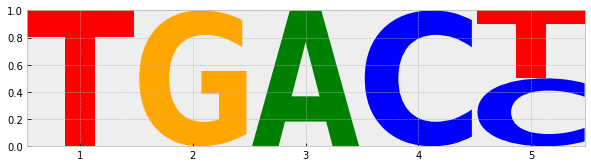

In [44]:
# 接下來選的matrix出現的次數稍微少一點
draw_matrix('TF_motif_seq_0270')

In [45]:
ms0270 = dfp[dfp.matrix_ID == 'TF_motif_seq_0270']
for i in range(95):
    print(compare_str(ms0270.iloc[0, 3], ms0270.iloc[i, 3]))

ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I------H--
--D---WRKYGQK--KGS--PR-YY-C---------K---------T-I-------H--
--DGY-WRKYGQK-VK-S--PRSYY-CT---C-VKK-VERS-------I---------P
--D---WRKYGQK--KGS-FPR-YY-C---------K-------------------H--
--DGY-WRKYGQK-VKG---PRSY-KCTN--C-VKK-VER--D---------------P
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I-----NH--
-DDGY-WRKYGQK-VK----PRSYY-CT---C-VKK-V-R------------------P
--DG--WRKYGQK--K-S---R-YY-CT-----------R----------Y--------
--DG--WRKYGQK--K-S---R-YY-CT-----------R----------Y--------
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I------H--
--DGY-WRKYGQK-VK-S-FPRSYY-CTN--C-VKK-VERS-D-----I----------
--DG--WRKYGQK--K----PR-YY-C---------K---------T------------
--DG--WRKYGQK--K-S---R-YY-C------------R

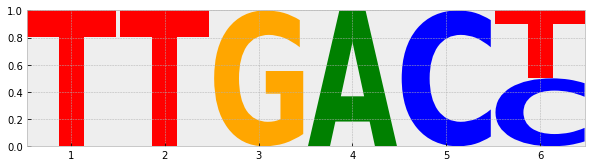

In [46]:
draw_matrix('TF_motif_seq_0339')

In [47]:
ms0339 = dfp[dfp.matrix_ID == 'TF_motif_seq_0339']
for i in range(95):
    print(compare_str(ms0339.iloc[0, 3], ms0339.iloc[i, 3]))

ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQVTEIIYKGQHNHEP
-DDGY-WRKYGQK-VKG---PRSYYKCT-PGC-V-K-VER-------------------
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I------H--
--D---WRKYGQK--KGS--PR-YY-C---------K---------T-I-------H--
--DGY-WRKYGQK-VK-S--PRSYY-CT---C-VKK-VERS-------I---------P
--D---WRKYGQK--KGS-FPR-YY-C---------K-------------------H--
--DGY-WRKYGQK-VKG---PRSY-KCTN--C-VKK-VER--D---------------P
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I-----NH--
-DDGY-WRKYGQK-VK----PRSYY-CT---C-VKK-V-R------------------P
--DG--WRKYGQK--K-S---R-YY-CT-----------R----------Y--------
--DG--WRKYGQK--K-S---R-YY-CT-----------R----------Y--------
--DG--WRKYGQK--KG---PR-YY-CT--------K------------I------H--
--DGY-WRKYGQK-VK-S-FPRSYY-CTN--C-VKK-VERS-D-----I----------
--DG--WRKYGQK--K----PR-YY-C---------K---------T------------
--DG--WRKYGQK--K-S---R-YY-C------------R

### Try 4

計算 meme 檔案中，ATCG 出現機率的平均值。

In [48]:
dfmeme.mean()

A    0.288901
C    0.232887
G    0.219038
T    0.259175
dtype: float64

### Try 5

計算 table_positive 蛋白質序列中，各個字母出現的狀況。

In [49]:
df_Pseq = pd.DataFrame(data = dfp['Pseq'])

In [50]:
df_Pseq.shape

(26480, 1)

In [51]:
df_DBD = pd.DataFrame(data = dfp['DBD_seq'])

In [52]:
amino_acid_code = ['A','C','D','E','F','G','H','I','K','L','M','N',
                   'P','Q','R','S','T','V','W','Y']

for amino_acid in amino_acid_code:
    name = 'Pseq_'+amino_acid
    name2 = "DBD_seq_"+amino_acid
    tmp = []
    tmp2 = []
    number = 0
    for Pseq in dfp['Pseq']:
        number = Pseq.count(amino_acid)
        tmp.append(Pseq.count(amino_acid)/len(Pseq))
    for DBD_seq in dfp['DBD_seq']:
        tmp2.append(DBD_seq.count(amino_acid)/number)
    df_Pseq[name] = tmp
    df_DBD[name2] = tmp2
    

In [53]:
df_DBD.head()

,DBD_seq,DBD_seq_A,DBD_seq_C,DBD_seq_D,DBD_seq_E,DBD_seq_F,DBD_seq_G,DBD_seq_H,DBD_seq_I,DBD_seq_K,...,DBD_seq_M,DBD_seq_N,DBD_seq_P,DBD_seq_Q,DBD_seq_R,DBD_seq_S,DBD_seq_T,DBD_seq_V,DBD_seq_W,DBD_seq_Y
0,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,0.0625,0.4,0.214286,0.307692,0.066667,0.666667,0.153846,0.166667,0.571429,...,0.0,0.166667,0.117647,0.148148,0.230769,0.06383,0.068966,0.5,0.25,0.625
1,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,0.0625,0.4,0.214286,0.307692,0.066667,0.666667,0.153846,0.166667,0.571429,...,0.0,0.166667,0.117647,0.148148,0.230769,0.06383,0.068966,0.5,0.25,0.625
2,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,0.0625,0.4,0.214286,0.307692,0.066667,0.666667,0.153846,0.166667,0.571429,...,0.0,0.166667,0.117647,0.148148,0.230769,0.06383,0.068966,0.5,0.25,0.625
3,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,0.0625,0.4,0.214286,0.307692,0.066667,0.666667,0.153846,0.166667,0.571429,...,0.0,0.166667,0.117647,0.148148,0.230769,0.06383,0.068966,0.5,0.25,0.625
4,ADDGYNWRKYGQKQVKGSEFPRSYYKCTNPGCPVKKKVERSLDGQV...,0.0625,0.4,0.214286,0.307692,0.066667,0.666667,0.153846,0.166667,0.571429,...,0.0,0.166667,0.117647,0.148148,0.230769,0.06383,0.068966,0.5,0.25,0.625


In [54]:
avg = df_DBD.drop(['DBD_seq'],axis=1).mean()

In [55]:
aaa =avg.values.tolist()

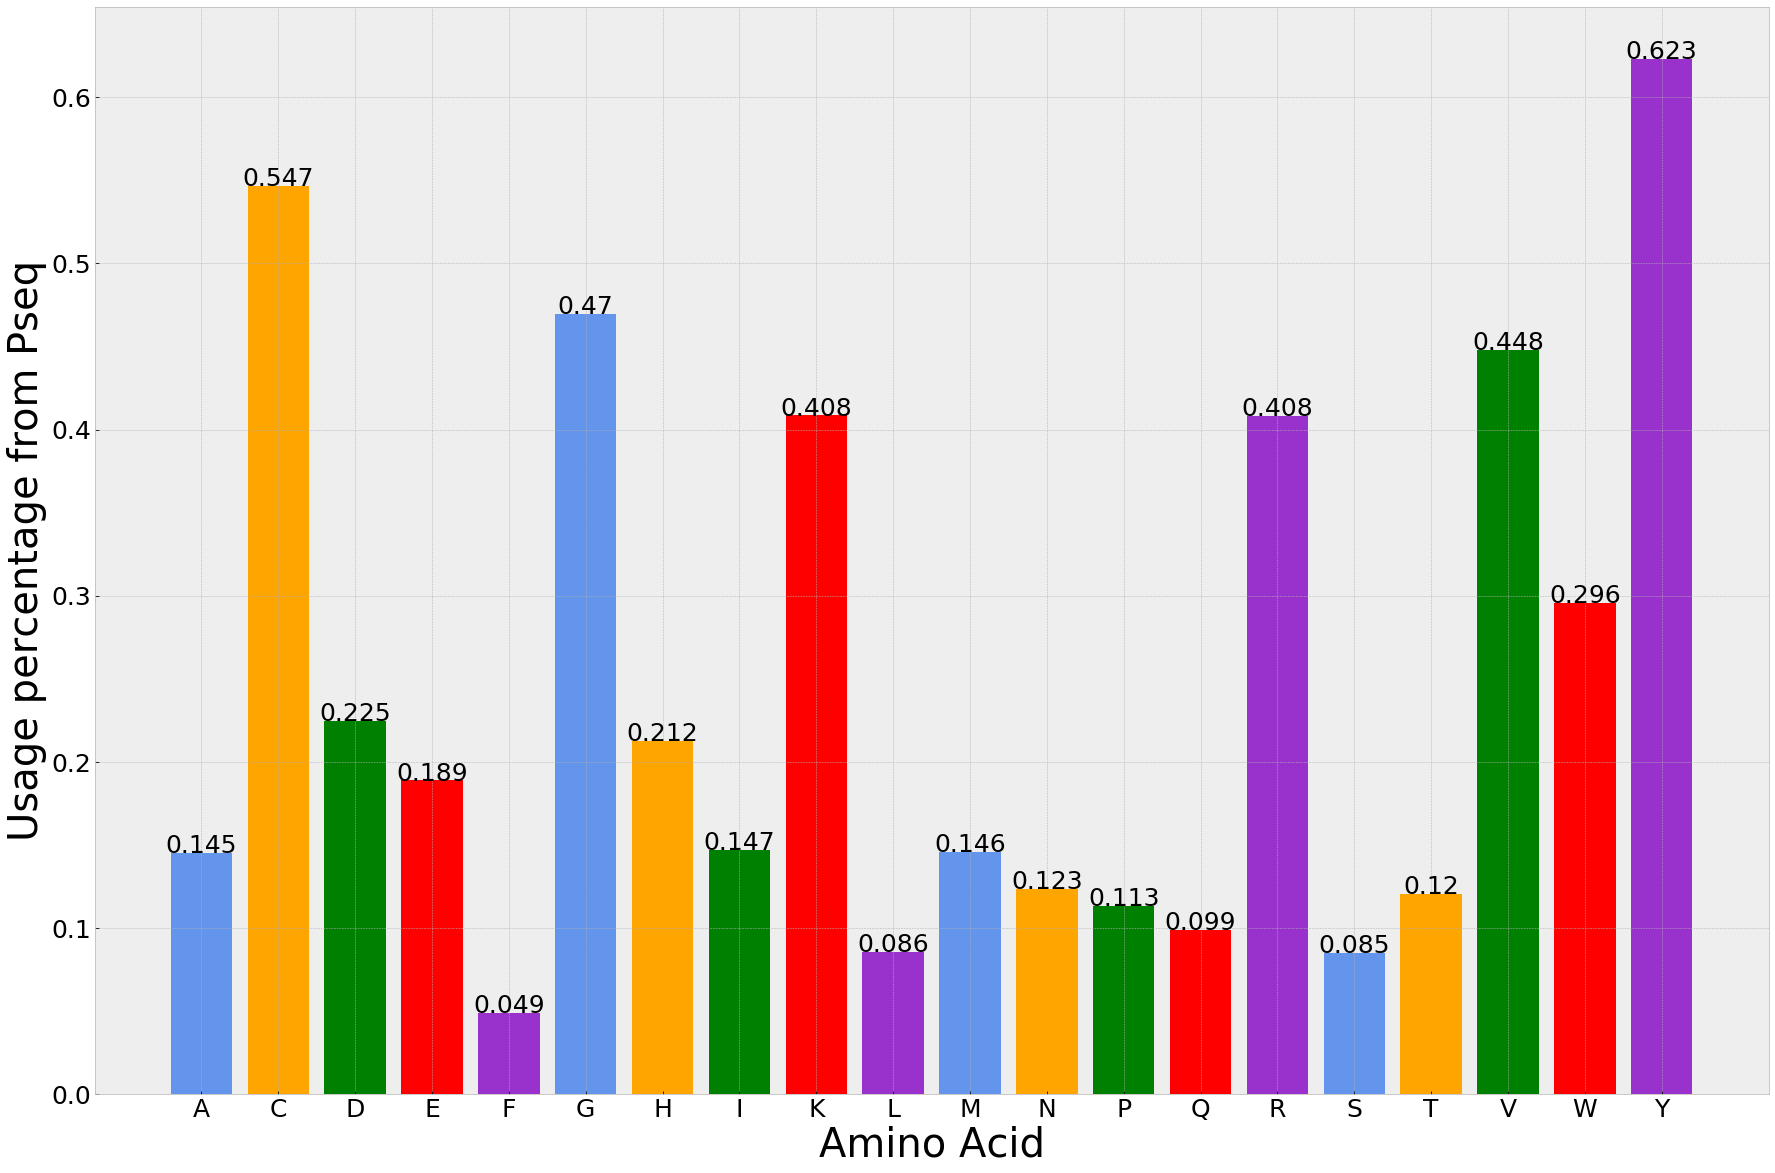

In [56]:
plt.figure(figsize = (30,20))
plt.bar(amino_acid_code,aaa,color=['cornflowerblue','orange','g','r','darkorchid'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("Amino Acid",fontsize=40)
plt.ylabel("Usage percentage from Pseq",fontsize=40)
for a,b in zip(amino_acid_code, aaa):
    plt.text(a, b, str(round(b, 3)),ha='center',fontsize=25)

In [57]:
df_Seq =pd.concat([df_Pseq, df_DBD], axis=1, sort=False)

In [58]:
import scipy.stats as stats
coeff = []
for amino_acid in amino_acid_code:
    tmp = stats.pearsonr(df_Pseq['Pseq_'+amino_acid],df_DBD['DBD_seq_'+amino_acid])[0]
    coeff.append(tmp)
    plt.figure(figsize=(7,5))   # 顯示圖框架大小

    plt.style.use("ggplot")     # 使用ggplot主題樣式
    plt.xlabel("amino acid percentage in Protein Sequence", fontweight = "bold")                  #設定x座標標題及粗體
    plt.ylabel("amino acid percentage in DBD Sequence", fontweight = "bold")   #設定y座標標題及粗體
    plt.title("Scatter of amino acid "+" "+amino_acid+" " +" in Pseq & DBDseq",
          fontsize = 15, fontweight = "bold")        #設定標題、字大小及粗體
    
    plt.axis([0,0.2, 0, 0.2])

    plt.text(0.025,0.15,'Correlation coefficient = '+str(tmp), style='oblique', ha='center',va='top',wrap=True)
    plt.scatter(df_Pseq['Pseq_'+amino_acid],          # x軸資料
            df_DBD['DBD_seq_'+amino_acid],            # y軸資料
            c = "m",                                  # 點顏色
            s = 10,                                    # 點大小
            alpha = .5,                               # 透明度
            marker = "o")                             # 點樣式
    plt.savefig("Scatter of amino acid "+" "+amino_acid+" " +" in Pseq & DBDseq"+".jpg")   #儲存圖檔
    plt.close()      # 關閉圖表

In [59]:
from mpl_toolkits.mplot3d import Axes3D
x = []
y = []
z = []
for amino_acid in amino_acid_code:
    print(amino_acid)
    x.append(df_Pseq['Pseq_'+amino_acid])
    y.append(df_DBD['DBD_seq_'+amino_acid])

    
'''
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)
plt.show()
'''


A
C
D
E
F
G
H
I
K
L
M
N
P
Q
R
S
T
V
W
Y


'\nfig = plt.figure()\nax = Axes3D(fig)\nax.scatter(x,y,z)\nplt.show()\n'

In [60]:
arrayx=np.array(x)
arrayy=np.array(y)

x2 = arrayx.flatten()
y2 = arrayy.flatten()

In [61]:
z = [10]*26480+[20]*26480+[30]*26480+[40]*26480+[50]*26480+[60]*26480+[70]*26480+[80]*26480+[90]*26480+[100]*26480+[110]*26480+[120]*26480+[130]*26480+[140]*26480+[150]*26480+[160]*26480+[170]*26480+[180]*26480+[190]*26480+[200]*26480
color = ['b']*26480+['y']*26480+['b']*26480+['y']*26480+['b']*26480+['y']*26480+['b']*26480+['y']*26480+['b']*26480+['y']*26480


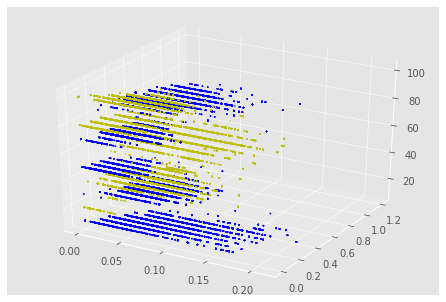

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx



fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(x2[:264800],y2[:264800],z[:264800],c = color,s = 1)
           
plt.show()


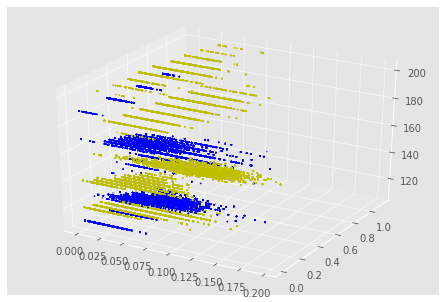

In [63]:
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(x2[264800:],y2[264800:],z[264800:],c = color,s = 1)
           
plt.show()

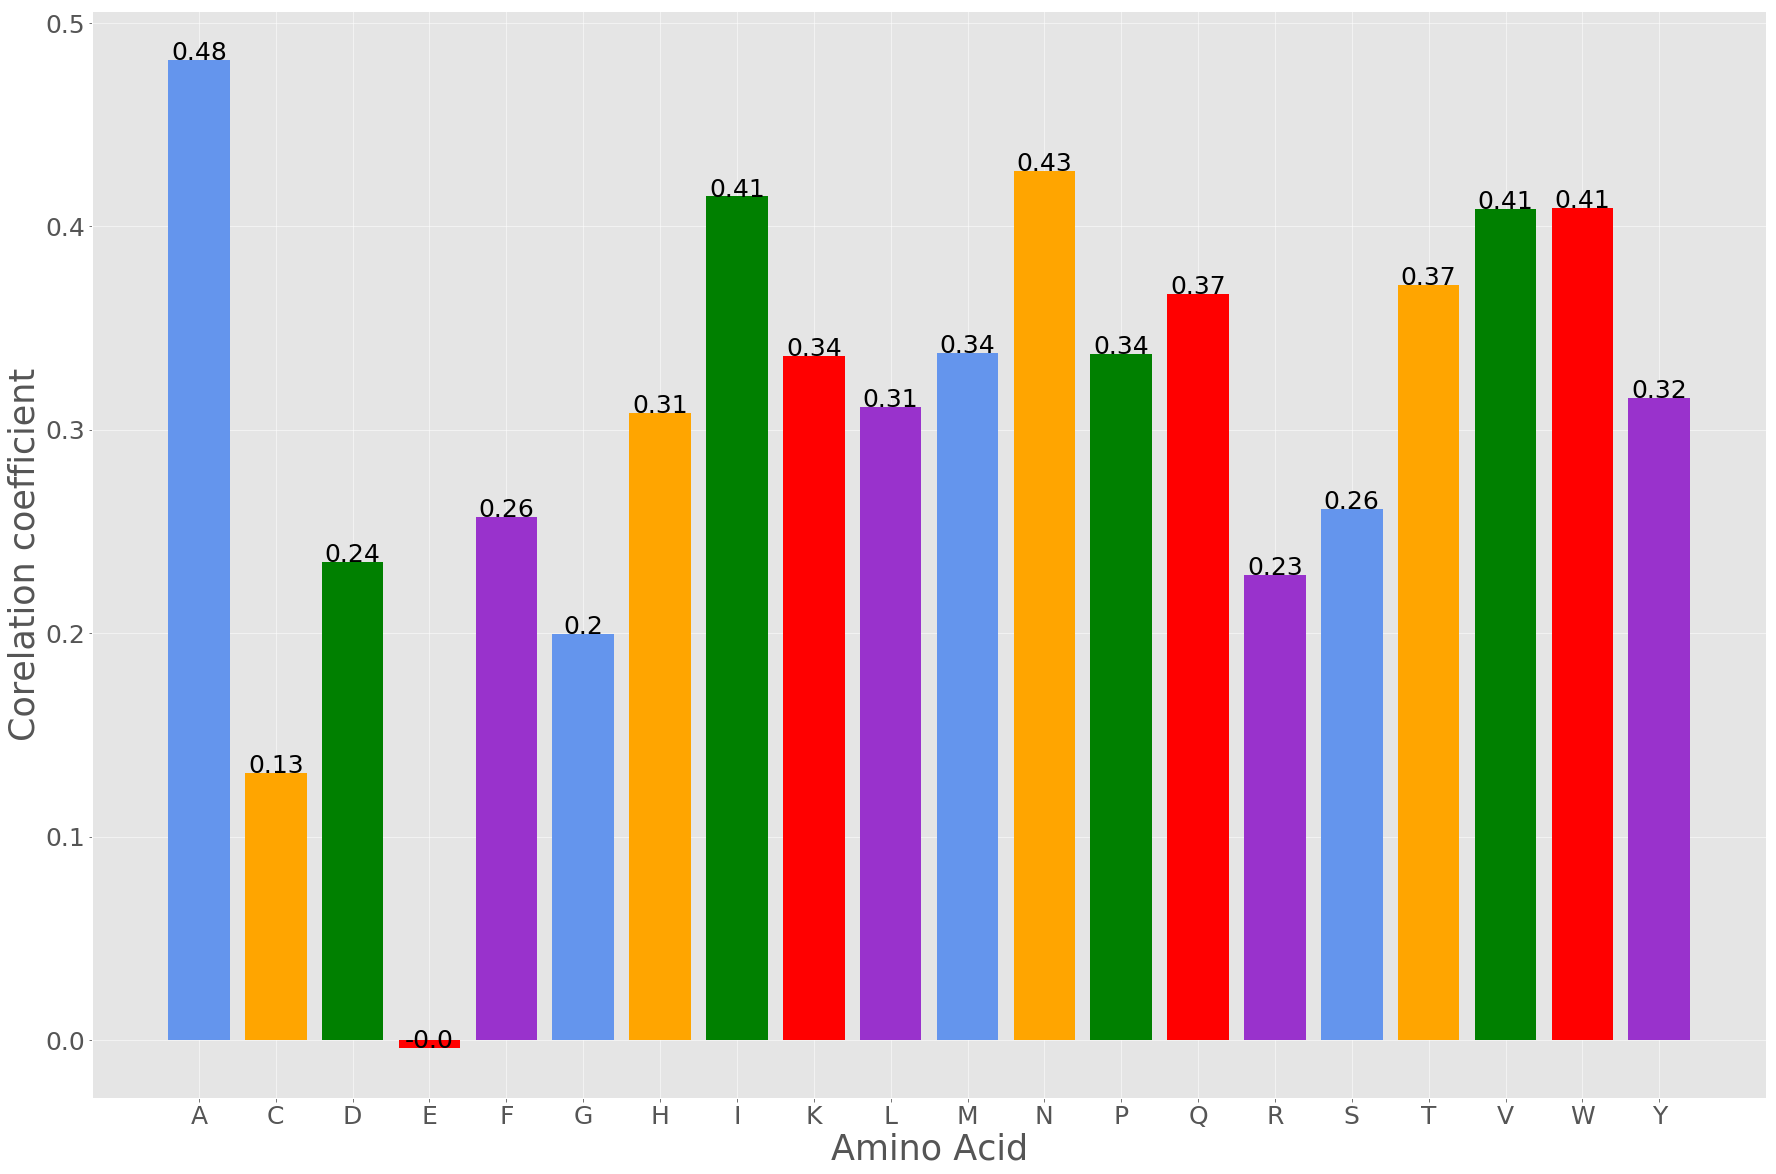

In [64]:
plt.figure(figsize = (30,20))
plt.bar(amino_acid_code,coeff,color=['cornflowerblue','orange','g','r','darkorchid'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("Amino Acid", fontsize=35)
plt.ylabel("Corelation coefficient", fontsize=35)
for a,b in zip(amino_acid_code, coeff):
    plt.text(a, b, str(round(b, 2)),ha='center',fontsize=25)